# <h1><center>Linear Regression</center></h1>

<div style="text-align: justify"> Supervised machine learnig alogrithms are broadly of two types, such as Regression and Classification. Regression deals with continous output problems where as classification deals with problems which have discrete outputs. </div> 

<div style="text-align: justify">
In this project, we will discuss how Linear Regression works from scratch for multiple varibles and in the end we will study how to use popular python library "Scikit-Learn" to implement linear regression.
</div>

In [1]:
#importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#storing data as a data frame in a variabel using pandas
data = pd.read_csv("housing.csv")

In [3]:
#Exploratory Data Analysis
data.head()                     #shows the 1st 5rows and all columns of the data

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [4]:
data.info()                    #Getting basic information about the data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       489 non-null    float64
 1   LSTAT    489 non-null    float64
 2   PTRATIO  489 non-null    float64
 3   MEDV     489 non-null    float64
dtypes: float64(4)
memory usage: 15.4 KB


In [5]:
data.describe()               #Getting some more information about the data set

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


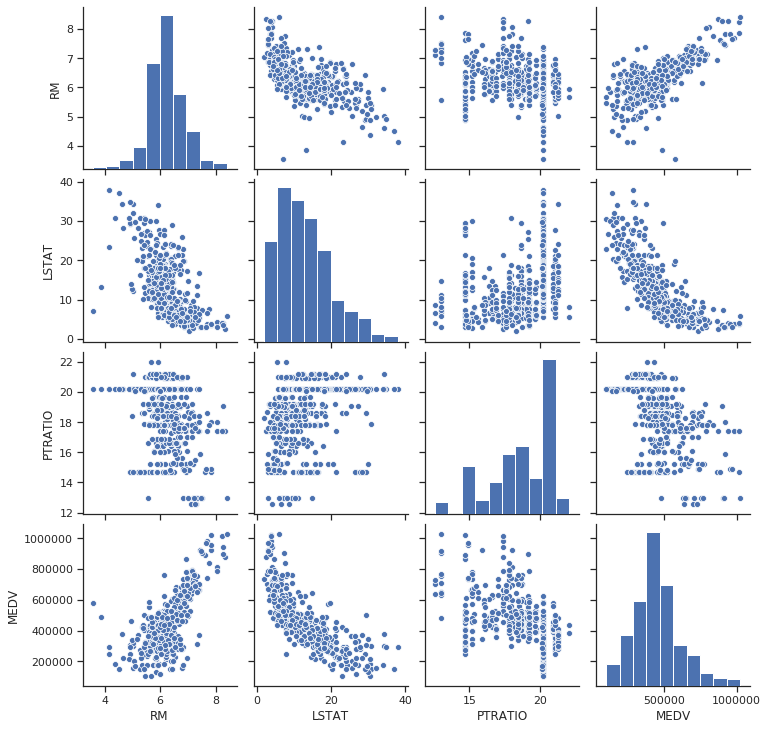

In [7]:
#Visualization of the Data

sns.set(style="ticks", color_codes=True)
g = sns.pairplot(data)
plt.show()

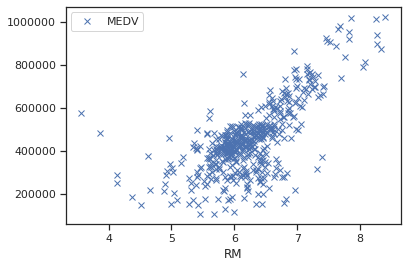

In [8]:
#Variation of price with individual columns
data.plot(x = 'RM', y = 'MEDV', style = 'x')
plt.show()

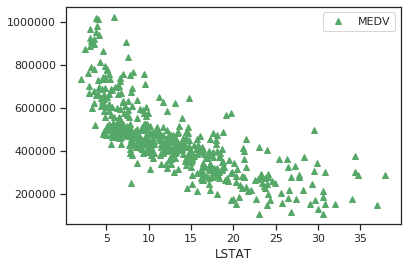

In [9]:
data.plot(y = 'MEDV', x = 'LSTAT', style = 'g^')
plt.show()

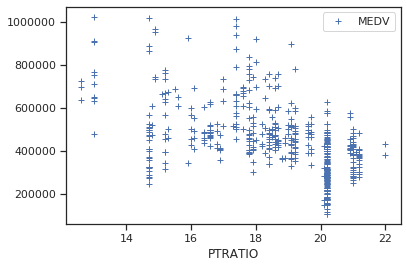

In [10]:
data.plot(y = 'MEDV', x = 'PTRATIO', style = '+')
plt.show()

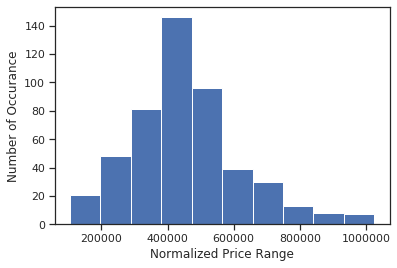

In [11]:
#Distribution of different
ax = data['MEDV'].hist(bins = 10, grid = False)
ax.set_xlabel("Price Range")
ax.set_ylabel("Number of Occurance")
plt.show()

In [12]:
#Deviding Data in train and test set randomly
i = np.random.rand(len(data)) < 0.8
train = data[i]
test  = data[~i]

In [13]:
#looking at the shape of the training data
train.shape

(385, 4)

In [14]:
#looking at the shape of the test data
test.shape

(104, 4)

In [15]:
#Getting feature matrix and output matrix
x_train = train.drop(columns = 'MEDV')
x_train.columns = ['X1', 'X2', 'X3']
y_train = train['MEDV']

In [16]:
#Adding an extra column to the feature matrix for y-intercept
idx = 0
new_col = 1
x_train.insert(loc = idx, column = 'W0', value = new_col)

In [17]:
x_train.head()              #looking at training feature matrix

,W0,X1,X2,X3
0,1,6.575,4.98,15.3
1,1,6.421,9.14,17.8
2,1,7.185,4.03,17.8
3,1,6.998,2.94,18.7
4,1,7.147,5.33,18.7


In [18]:
# Calculating the optimized parameters for the linear regression 

theta = np.dot(np.linalg.inv(np.dot(x_train.T, x_train)), np.dot(x_train.T, y_train))

In [19]:
print(theta)

[449101.08886783  78826.41751228 -10734.46282679 -18838.53291052]


In [20]:
#Feature matrix for testing
x_test = test.drop(columns = 'MEDV')
idx = 0
new_col = 1
x_test.insert(loc = idx, column = 'W0', value = new_col) #Adding new column for intercept
x_test.head()                                            #looking at the test feature data set

,W0,RM,LSTAT,PTRATIO
9,1,6.004,17.10,15.2
13,1,5.949,8.26,21.0
17,1,5.990,14.67,21.0
19,1,5.727,11.28,21.0
20,1,5.570,21.02,21.0


In [21]:
#Getting test output for comparision
y_test = test['MEDV']
y_test.shape

(104,)

In [22]:
#predicting the housing prices in normalized form
y_predict = np.dot(x_test, theta)

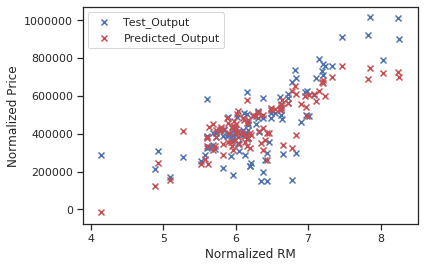

In [23]:
#Plotting RM vs Predicted Price
plt.scatter(x_test['RM'], y_test, c = 'b', marker = 'x', label = 'Test_Output')
plt.scatter(x_test['RM'], y_predict, c = 'r', marker = 'x', label = 'Predicted_Output')
plt.legend(loc='upper left')
plt.xlabel('Normalized RM')
plt.ylabel('Normalized Price')
plt.show()

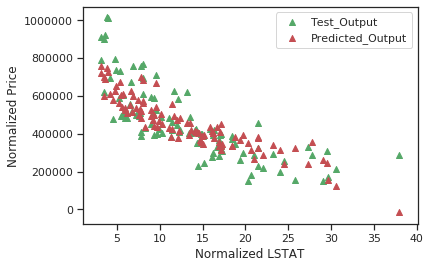

In [24]:
#Plotting LSTAT vs Predicted Price
plt.scatter(x_test['LSTAT'], y_test, c = 'g', marker = '^', label = 'Test_Output')
plt.scatter(x_test['LSTAT'], y_predict, c = 'r', marker = '^', label = 'Predicted_Output')
plt.legend(loc='upper right')
plt.ylabel('Normalized Price')
plt.xlabel('Normalized LSTAT')
plt.show()

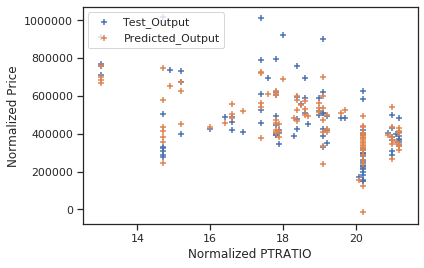

In [25]:
#Plotting PTRATIO vs Predicted Price
plt.scatter(x_test['PTRATIO'], y_test, marker = '+', label = 'Test_Output')
plt.scatter(x_test['PTRATIO'], y_predict, marker = '+', label = 'Predicted_Output')
plt.legend(loc='upper left')
plt.ylabel('Normalized Price')
plt.xlabel('Normalized PTRATIO')
plt.show()

In [26]:
#comparing test output with predicted output
output = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})
output.head(8)

,Actual,Predicted
9,396900.0,452469.885034
13,428400.0,433763.592578
17,367500.0,368187.568977
19,382200.0,383846.050154
20,285600.0,266916.634671
27,310800.0,344663.726797
36,420000.0,425346.140821
45,405300.0,450184.188613


In [27]:
#Importing Scikit learn library
from sklearn.linear_model import LinearRegression

In [28]:
#fitting data into the model
regressor = LinearRegression()  
fiting = regressor.fit(x_train, y_train)

In [29]:
#predicting
y_pred = regressor.predict(x_test)

In [30]:
#Comparing all the outputs
Output = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict, 'skl_pred': y_pred})
Output.head(10)

,Actual,Predicted,skl_pred
9,396900.0,452469.885034,452469.885034
13,428400.0,433763.592578,433763.592578
17,367500.0,368187.568977,368187.568976
19,382200.0,383846.050154,383846.050154
20,285600.0,266916.634671,266916.634671
27,310800.0,344663.726797,344663.726797
36,420000.0,425346.140821,425346.140821
45,405300.0,450184.188613,450184.188613
46,420000.0,416088.352497,416088.352497
47,348600.0,385406.746225,385406.746225
